In [1]:
pip install darts

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import fosforml
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

In [3]:
my_session.connection.database

'ASSORTMENT_PLANNING'

In [4]:
my_session.connection.schema

'CPG_BRONZE'

In [5]:
table_name = "ASSORTMENT_PLANNING.CPG_BRONZE.SALES_CLEAN"

In [6]:
sf_df = my_session.sql("select * from {}".format(table_name))
type(sf_df)
df=sf_df.to_pandas()
type(df)

pandas.core.frame.DataFrame

In [7]:
df.head(5)

,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,DISTRIBUTOR_CODE,OUTLET_CODE,CITY,STATE,COUNTY,STREET,PRODUCT_CODE,CATEGORY,SUBCATEGORY,BRAND
0,202312,2023-12-26,2023-11-27,372.73,2,0.000650,372.727273,202212,DB0110,OL112848,Carbondale,Illinois,City Center,Str2,PRD0118,Soap,Medicated Soap,Burgundy
1,202312,2023-12-26,2023-11-27,436.36,3,0.000900,436.363636,202212,DB0110,OL112848,Carbondale,Illinois,City Center,Str2,PRD0131,Soap,Toilet Soap,Grape vine
2,202312,2023-12-24,2023-11-27,202.82,2,0.000214,209.090909,202212,DB0209,OL112555,Shelbyville,Tennessee,City Center,Str5,PRD0065,Hair Care,Hair Oil,Crimson
3,202312,2023-12-29,2023-11-27,142.86,16,0.000384,142.857143,202212,DB0655,OL113173,Renton,Washington,Orange,Str2,PRD0106,Hair Care,Shampoo,Hair & Shoulders
4,202312,2023-12-17,2023-11-27,145.45,1,0.000300,145.454545,202212,DB0652,OL112373,Wallingford,Connecticut,Dolphin,Str1,PRD0070,Perfume and Deodrants,Female Deodrant,Pista green


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966400 entries, 0 to 966399
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   MNTH_CODE         966400 non-null  int32  
 1   TRANS_DATE        966400 non-null  object 
 2   START_DATE        966400 non-null  object 
 3   SALES_VALUE       966400 non-null  float64
 4   SALES_UNITS       966400 non-null  int16  
 5   SALES_VOLUME      966400 non-null  float64
 6   SALES_PTR_VALUE   966400 non-null  float64
 7   OC_CODE           966400 non-null  int32  
 8   DISTRIBUTOR_CODE  966400 non-null  object 
 9   OUTLET_CODE       966400 non-null  object 
 10  CITY              966400 non-null  object 
 11  STATE             966400 non-null  object 
 12  COUNTY            966400 non-null  object 
 13  STREET            966400 non-null  object 
 14  PRODUCT_CODE      966400 non-null  object 
 15  CATEGORY          966400 non-null  object 
 16  SUBCATEGORY       96

## Generate Additional Features

In [9]:
import pandas as pd

def generate_features(df):
    # Ensure the TRANS_DATE column is in datetime format
    df['TRANS_DATE'] = pd.to_datetime(df['TRANS_DATE'])
    
    # Extract temporal features
    df['year'] = df['TRANS_DATE'].dt.year
    df['month'] = df['TRANS_DATE'].dt.month
    df['day'] = df['TRANS_DATE'].dt.day
    df['dayofweek'] = df['TRANS_DATE'].dt.dayofweek
    df['quarter'] = df['TRANS_DATE'].dt.quarter
    df['is_month_start'] = df['TRANS_DATE'].dt.is_month_start
    df['is_month_end'] = df['TRANS_DATE'].dt.is_month_end
    
    # Create UNIT_PTR feature
    df['UNIT_PTR'] = df['SALES_PTR_VALUE'] / df['SALES_UNITS']
    
    return df

In [10]:
df = generate_features(df)

In [11]:
df.head()

,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,DISTRIBUTOR_CODE,OUTLET_CODE,...,SUBCATEGORY,BRAND,year,month,day,dayofweek,quarter,is_month_start,is_month_end,UNIT_PTR
0,202312,2023-12-26,2023-11-27,372.73,2,0.000650,372.727273,202212,DB0110,OL112848,...,Medicated Soap,Burgundy,2023,12,26,1,4,False,False,186.363636
1,202312,2023-12-26,2023-11-27,436.36,3,0.000900,436.363636,202212,DB0110,OL112848,...,Toilet Soap,Grape vine,2023,12,26,1,4,False,False,145.454545
2,202312,2023-12-24,2023-11-27,202.82,2,0.000214,209.090909,202212,DB0209,OL112555,...,Hair Oil,Crimson,2023,12,24,6,4,False,False,104.545455
3,202312,2023-12-29,2023-11-27,142.86,16,0.000384,142.857143,202212,DB0655,OL113173,...,Shampoo,Hair & Shoulders,2023,12,29,4,4,False,False,8.928571
4,202312,2023-12-17,2023-11-27,145.45,1,0.000300,145.454545,202212,DB0652,OL112373,...,Female Deodrant,Pista green,2023,12,17,6,4,False,False,145.454545


In [12]:
df = df.sort_values(by='TRANS_DATE')

In [13]:
# Convert all column names to uppercase
df.columns = [col.upper() for col in df.columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966400 entries, 787515 to 905006
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   MNTH_CODE         966400 non-null  int32         
 1   TRANS_DATE        966400 non-null  datetime64[ns]
 2   START_DATE        966400 non-null  object        
 3   SALES_VALUE       966400 non-null  float64       
 4   SALES_UNITS       966400 non-null  int16         
 5   SALES_VOLUME      966400 non-null  float64       
 6   SALES_PTR_VALUE   966400 non-null  float64       
 7   OC_CODE           966400 non-null  int32         
 8   DISTRIBUTOR_CODE  966400 non-null  object        
 9   OUTLET_CODE       966400 non-null  object        
 10  CITY              966400 non-null  object        
 11  STATE             966400 non-null  object        
 12  COUNTY            966400 non-null  object        
 13  STREET            966400 non-null  object        
 14  PROD

In [15]:
df_sorted = df.sort_values(by=['OUTLET_CODE', 'PRODUCT_CODE', 'TRANS_DATE'])

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
# List of columns in the desired order
columns_order = ['OUTLET_CODE', 'PRODUCT_CODE', 'TRANS_DATE', 'UNIT_PTR'] + [col for col in df_sorted.columns if col not in ['OUTLET_CODE', 'PRODUCT_CODE']]

# Reorder the DataFrame columns
df_sorted = df_sorted[columns_order]

In [18]:
# Create lagged columns within each group of OUTLET_CODE and PRODUCT_CODE
df_sorted['SALES_UNIT_LAG_1'] = df_sorted.groupby(['OUTLET_CODE', 'PRODUCT_CODE'])['SALES_UNITS'].shift(1)
df_sorted['SALES_UNIT_LAG_2'] = df_sorted.groupby(['OUTLET_CODE', 'PRODUCT_CODE'])['SALES_UNITS'].shift(2)
df_sorted['SALES_UNIT_LAG_3'] = df_sorted.groupby(['OUTLET_CODE', 'PRODUCT_CODE'])['SALES_UNITS'].shift(3)

In [19]:
df_sorted['FREQUENCY'] = df_sorted.groupby(['OUTLET_CODE', 'PRODUCT_CODE']).cumcount() + 1

In [20]:
df_sorted.head()

,OUTLET_CODE,PRODUCT_CODE,TRANS_DATE,UNIT_PTR,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,DISTRIBUTOR_CODE,CITY,STATE,COUNTY,STREET,CATEGORY,SUBCATEGORY,BRAND,YEAR,MONTH,DAY,DAYOFWEEK,QUARTER,IS_MONTH_START,IS_MONTH_END,UNIT_PTR,SALES_UNIT_LAG_1,SALES_UNIT_LAG_2,SALES_UNIT_LAG_3,FREQUENCY
219329,OL10328,PRD0014,2023-12-08,17.857143,202312,2023-12-08,2023-11-27,107.14,6,0.000312,107.142857,202212,DB0110,Durham,North Carolina,Santa Cruz,Str5,Dental,ToothPaste,Toothy Sensitive,2023,12,8,4,4,False,False,17.857143,NaN,NaN,NaN,1
512107,OL10328,PRD0058,2023-10-06,4.464286,202310,2023-10-06,2023-10-02,53.57,12,0.000132,53.571429,202210,DB0110,Durham,North Carolina,Santa Cruz,Str5,Soap,Liquid Soap,Rust,2023,10,6,4,4,False,False,4.464286,NaN,NaN,NaN,1
117235,OL10328,PRD0064,2024-04-21,99.090909,202404,2024-04-21,2024-04-03,198.18,2,0.000214,198.181818,202204,DB0110,Durham,North Carolina,Santa Cruz,Str5,Hair Care,Conditioner,Bamboo,2024,4,21,6,2,False,False,99.090909,NaN,NaN,NaN,1
475887,OL10328,PRD0064,2024-07-14,104.545455,202407,2024-07-14,2024-07-03,101.41,1,0.000107,104.545455,202207,DB0110,Durham,North Carolina,Santa Cruz,Str5,Hair Care,Conditioner,Bamboo,2024,7,14,6,3,False,False,104.545455,2.0,NaN,NaN,2
431721,OL10328,PRD0064,2024-07-21,104.545455,202407,2024-07-21,2024-07-03,209.09,2,0.000214,209.090909,202207,DB0110,Durham,North Carolina,Santa Cruz,Str5,Hair Care,Conditioner,Bamboo,2024,7,21,6,3,False,False,104.545455,1.0,2.0,NaN,3


Split the dataset into test and train

In [21]:
# Split the data
train_data = df_sorted[df_sorted['MNTH_CODE'] != 202408]
test_data = df_sorted[df_sorted['MNTH_CODE'] == 202408]

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891440 entries, 219329 to 278374
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   OUTLET_CODE       891440 non-null  object        
 1   PRODUCT_CODE      891440 non-null  object        
 2   TRANS_DATE        891440 non-null  datetime64[ns]
 3   UNIT_PTR          891440 non-null  float64       
 4   MNTH_CODE         891440 non-null  int32         
 5   TRANS_DATE        891440 non-null  datetime64[ns]
 6   START_DATE        891440 non-null  object        
 7   SALES_VALUE       891440 non-null  float64       
 8   SALES_UNITS       891440 non-null  int16         
 9   SALES_VOLUME      891440 non-null  float64       
 10  SALES_PTR_VALUE   891440 non-null  float64       
 11  OC_CODE           891440 non-null  int32         
 12  DISTRIBUTOR_CODE  891440 non-null  object        
 13  CITY              891440 non-null  object        
 14  STAT

K means clustering of OUTLET_CODES

In [23]:
# #Label Encoding

# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Initialize the label encoder
# label_encoder = LabelEncoder()

# # List of columns to encode
# columns_to_encode = ['PRODUCT_CODE', 'CATEGORY', 'SUBCATEGORY', 'BRAND']

# # Apply label encoding to each column
# for column in columns_to_encode:
#     train_data[column + '_encoded'] = label_encoder.fit_transform(train_data[column])

# # Convert all column names to uppercase and replace spaces with underscores
# train_data.columns = train_data.columns.str.upper().str.replace(' ', '_')

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def label_encode_dataframe(df, columns_to_encode):
    # Initialize the label encoder
    label_encoder = LabelEncoder()
    
    # Apply label encoding to each column
    for column in columns_to_encode:
        df[column + '_encoded'] = label_encoder.fit_transform(df[column])
    
    # Convert all column names to uppercase and replace spaces with underscores
    df.columns = df.columns.str.upper().str.replace(' ', '_')
    
    return df

In [25]:
columns_to_encode = ['PRODUCT_CODE']
train_data = label_encode_dataframe(train_data, columns_to_encode)

In [26]:
type(train_data)

pandas.core.frame.DataFrame

In [27]:
mean_product_code = train_data.groupby('OUTLET_CODE')['PRODUCT_CODE_ENCODED'].mean().reset_index()
count_frequency = train_data.groupby('OUTLET_CODE')['FREQUENCY'].count().reset_index()
mean_unit_ptr = train_data.groupby('OUTLET_CODE')['UNIT_PTR'].mean().reset_index()
mean_sales_units = train_data.groupby('OUTLET_CODE')['SALES_UNITS'].mean().reset_index()

mean_product_code.rename(columns={'PRODUCT_CODE_ENCODED': 'MEAN_PRODUCT_CODE'}, inplace=True),
count_frequency.rename(columns={'FREQUENCY': 'COUNT_FREQUENCY'}, inplace=True)
mean_unit_ptr.rename(columns={'UNIT_PTR': 'MEAN_UNIT_PTR'}, inplace=True)
mean_sales_units.rename(columns={'SALES_UNITS': 'MEAN_SALES_UNITS'}, inplace=True)

# Merge the aggregated DataFrames with the train_data DataFrame
train_data = train_data.merge(mean_product_code, on='OUTLET_CODE', how='left')
train_data = train_data.merge(count_frequency, on='OUTLET_CODE', how='left')
train_data = train_data.merge(mean_unit_ptr, on='OUTLET_CODE', how='left')
train_data = train_data.merge(mean_sales_units, on='OUTLET_CODE', how='left')

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Select the relevant columns
columns_to_select = ['OUTLET_CODE', 'MEAN_PRODUCT_CODE', 'COUNT_FREQUENCY', 'MEAN_UNIT_PTR', 'MEAN_SALES_UNITS']

# Identify unique combinations and save them in another DataFrame
unique_combinations_df = train_data[columns_to_select].drop_duplicates()

In [29]:
unique_combinations_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18825 entries, 0 to 891428
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OUTLET_CODE        18825 non-null  object 
 1   MEAN_PRODUCT_CODE  18825 non-null  float64
 2   COUNT_FREQUENCY    18825 non-null  int64  
 3   MEAN_UNIT_PTR      18825 non-null  float64
 4   MEAN_UNIT_PTR      18825 non-null  float64
 5   MEAN_SALES_UNITS   18825 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.0+ MB


In [30]:
# Assuming your data is in a DataFrame called unique_combinations_df
# Drop the duplicate column
unique_combinations_df = unique_combinations_df.loc[:, ~unique_combinations_df.columns.duplicated()]

# Display the updated DataFrame
unique_combinations_df.head()

,OUTLET_CODE,MEAN_PRODUCT_CODE,COUNT_FREQUENCY,MEAN_UNIT_PTR,MEAN_SALES_UNITS
0,OL10328,54.000000,28,60.736317,7.607143
28,OL10329,52.064171,187,84.794170,5.882353
215,OL10330,47.974775,555,174.008590,5.506306
770,OL10331,42.702128,47,165.493230,1.808511
817,OL10332,46.425197,127,8.872328,28.944882


In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called unique_combinations_df
# Select features for scaling
features = ['MEAN_PRODUCT_CODE', 'COUNT_FREQUENCY', 'MEAN_UNIT_PTR', 'MEAN_SALES_UNITS']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the selected features
scaled_features = scaler.fit_transform(unique_combinations_df[features])

# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features)

# Add the OUTLET_CODE column back to the scaled DataFrame with proper alignment
scaled_df['OUTLET_CODE'] = unique_combinations_df['OUTLET_CODE'].values

# Reorder columns to have OUTLET_CODE first
scaled_df = scaled_df[['OUTLET_CODE', 'MEAN_PRODUCT_CODE', 'COUNT_FREQUENCY', 'MEAN_UNIT_PTR', 'MEAN_SALES_UNITS']]

In [34]:
scaled_df.head()

,OUTLET_CODE,MEAN_PRODUCT_CODE,COUNT_FREQUENCY,MEAN_UNIT_PTR,MEAN_SALES_UNITS
0,OL10328,0.555005,-0.216507,0.349407,-0.254191
1,OL10329,0.290471,1.562173,0.822350,-0.294242
2,OL10330,-0.268350,5.678868,2.576178,-0.302974
3,OL10331,-0.988864,-0.003961,2.408778,-0.388840
4,OL10332,-0.480102,0.890973,-0.670164,0.241291


In [32]:
# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
k_range = range(2, 11)  # Silhouette score is not defined for k=1
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

In [35]:
# Perform clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
scaled_df['CLUSTER'] = kmeans.fit_predict(scaled_features)

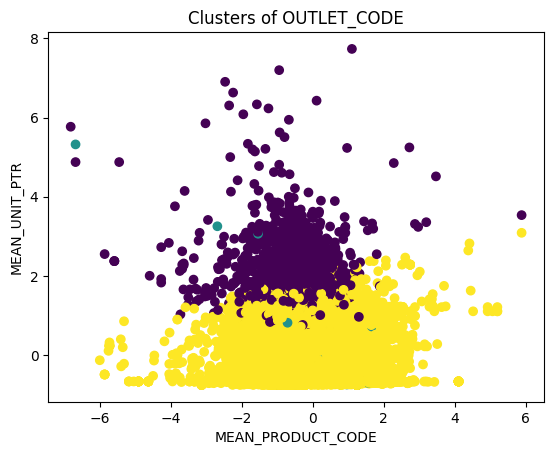

In [40]:
# Plot the clusters
plt.scatter(scaled_df['MEAN_PRODUCT_CODE'], scaled_df['MEAN_UNIT_PTR'], c=scaled_df['CLUSTER'], cmap='viridis')
plt.xlabel('COUNT_FRQ')
plt.ylabel('MEAN_UNIT_PTR')
plt.title('Clusters of OUTLET_CODE')
plt.show()

In [36]:
scaled_df.head()

,OUTLET_CODE,MEAN_PRODUCT_CODE,COUNT_FREQUENCY,MEAN_UNIT_PTR,MEAN_SALES_UNITS,CLUSTER
0,OL10328,0.555005,-0.216507,0.349407,-0.254191,2
1,OL10329,0.290471,1.562173,0.822350,-0.294242,0
2,OL10330,-0.268350,5.678868,2.576178,-0.302974,0
3,OL10331,-0.988864,-0.003961,2.408778,-0.388840,0
4,OL10332,-0.480102,0.890973,-0.670164,0.241291,2


In [37]:
# Merge the CLUSTER column back to train_data on OUTLET_CODE
train_data = train_data.merge(scaled_df[['OUTLET_CODE', 'CLUSTER']], on='OUTLET_CODE', how='left')

In [39]:
train_data.head()

,OUTLET_CODE,PRODUCT_CODE,TRANS_DATE,UNIT_PTR,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,DISTRIBUTOR_CODE,CITY,STATE,COUNTY,STREET,CATEGORY,SUBCATEGORY,BRAND,YEAR,MONTH,DAY,DAYOFWEEK,QUARTER,IS_MONTH_START,IS_MONTH_END,UNIT_PTR,SALES_UNIT_LAG_1,SALES_UNIT_LAG_2,SALES_UNIT_LAG_3,FREQUENCY,PRODUCT_CODE_ENCODED,MEAN_PRODUCT_CODE,COUNT_FREQUENCY,MEAN_UNIT_PTR,MEAN_UNIT_PTR,MEAN_SALES_UNITS,CLUSTER
0,OL10328,PRD0014,2023-12-08,17.857143,202312,2023-12-08,2023-11-27,107.14,6,0.000312,107.142857,202212,DB0110,Durham,North Carolina,Santa Cruz,Str5,Dental,ToothPaste,Toothy Sensitive,2023,12,8,4,4,False,False,17.857143,NaN,NaN,NaN,1,7,54.0,28,60.736317,60.736317,7.607143,2
1,OL10328,PRD0058,2023-10-06,4.464286,202310,2023-10-06,2023-10-02,53.57,12,0.000132,53.571429,202210,DB0110,Durham,North Carolina,Santa Cruz,Str5,Soap,Liquid Soap,Rust,2023,10,6,4,4,False,False,4.464286,NaN,NaN,NaN,1,27,54.0,28,60.736317,60.736317,7.607143,2
2,OL10328,PRD0064,2024-04-21,99.090909,202404,2024-04-21,2024-04-03,198.18,2,0.000214,198.181818,202204,DB0110,Durham,North Carolina,Santa Cruz,Str5,Hair Care,Conditioner,Bamboo,2024,4,21,6,2,False,False,99.090909,NaN,NaN,NaN,1,33,54.0,28,60.736317,60.736317,7.607143,2
3,OL10328,PRD0064,2024-07-14,104.545455,202407,2024-07-14,2024-07-03,101.41,1,0.000107,104.545455,202207,DB0110,Durham,North Carolina,Santa Cruz,Str5,Hair Care,Conditioner,Bamboo,2024,7,14,6,3,False,False,104.545455,2.0,NaN,NaN,2,33,54.0,28,60.736317,60.736317,7.607143,2
4,OL10328,PRD0064,2024-07-21,104.545455,202407,2024-07-21,2024-07-03,209.09,2,0.000214,209.090909,202207,DB0110,Durham,North Carolina,Santa Cruz,Str5,Hair Care,Conditioner,Bamboo,2024,7,21,6,3,False,False,104.545455,1.0,2.0,NaN,3,33,54.0,28,60.736317,60.736317,7.607143,2
